#imports

In [ ]:
import os
from os import listdir
import numpy as np
import cv2
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, LocallyConnected2D, MaxPooling2D, Flatten, Dense, Dropout, Activation , ZeroPadding2D
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json
from google.colab.patches import cv2_imshow  
import cv2
import glob
import pandas as pd
from tensorflow.keras.optimizers import RMSprop , Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import CSVLogger
import keras
from matplotlib import pyplot as plt



#prep data

In [ ]:
#function to copy the whole data directory before working
from distutils.dir_util import copy_tree
copy_tree("/content/drive/MyDrive/fbdpface/myfinaldata", "/content/drive/MyDrive/VGGface/data244")

['/content/drive/MyDrive/VGGface/data244/test/Abdulhadi/SmartSelect_20220401-000754_Instagram0.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/CR7/SmartSelect_20220414-234847_Instagram0.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Basak/SmartSelect_20220331-232455_Instagram0.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Abdurrahman/VideoCapture_20220401-2337370.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Eyad/20220331_2308110.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Baraa/VideoCapture_20220401-2304060.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Ahmed/20220414_2139210.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Bilal/20211011_1549160.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Alhamza/20210216_1339020.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Ameer/SmartSelect_20220330-224611_WhatsApp0.jpg',
 '/content/drive/MyDrive/VGGface/data244/test/Nour/VideoCapture_20220401-2311300.jpg',
 '/content/drive/MyDrive/VGGface/data244/

In [ ]:
import glob

for filename in glob.glob('/content/drive/MyDrive/VGGface/data244/*/*/*'): # path to your images folder
    print(filename)
    img=cv2.imread(filename)


    img = cv2.resize(img, (244,244))

    cv2.imwrite(f'{filename}', img)
    



/content/drive/MyDrive/VGGface/data244/test/Abdulhadi/SmartSelect_20220401-000754_Instagram0.jpg
/content/drive/MyDrive/VGGface/data244/test/CR7/SmartSelect_20220414-234847_Instagram0.jpg
/content/drive/MyDrive/VGGface/data244/test/Basak/SmartSelect_20220331-232455_Instagram0.jpg
/content/drive/MyDrive/VGGface/data244/test/Abdurrahman/VideoCapture_20220401-2337370.jpg
/content/drive/MyDrive/VGGface/data244/test/Eyad/20220331_2308110.jpg
/content/drive/MyDrive/VGGface/data244/test/Baraa/VideoCapture_20220401-2304060.jpg
/content/drive/MyDrive/VGGface/data244/test/Ahmed/20220414_2139210.jpg
/content/drive/MyDrive/VGGface/data244/test/Bilal/20211011_1549160.jpg
/content/drive/MyDrive/VGGface/data244/test/Alhamza/20210216_1339020.jpg
/content/drive/MyDrive/VGGface/data244/test/Ameer/SmartSelect_20220330-224611_WhatsApp0.jpg
/content/drive/MyDrive/VGGface/data244/test/Nour/VideoCapture_20220401-2311300.jpg
/content/drive/MyDrive/VGGface/data244/test/Oubaid/SmartSelect_20220331-233534_WhatsA

#vgg (ignore)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
from keras.models import model_from_json
model.load_weights(r'/content/drive/MyDrive/VGGface/vgg_face_weights.h5')

In [ ]:
model.layers[-2].output

<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>

In [ ]:
model = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                             

#data gen

In [ ]:
#creating data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


valdgen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



In [ ]:
#classes' names
path = '/content/drive/MyDrive/VGGface/data244/train'
dir_list = os.listdir(path)
dir_list.sort()
dir_list

['Abdulhadi',
 'Abdurrahman',
 'Ahmed',
 'Alhamza',
 'Ameer',
 'Baraa',
 'Basak',
 'Bilal',
 'CR7',
 'Eyad',
 'Hamdo',
 'Hamo',
 'Karim',
 'Kurnasan',
 'Mahasin',
 'Melike',
 'Nacho',
 'Nour',
 'Obada',
 'Oubaid',
 'Ram',
 'Safiye',
 'Sarah',
 'Vini',
 'Zeynep_bastik']

In [ ]:
#fitting the traing data

trainingdata = r'/content/drive/MyDrive/VGGface/data244/train'

dir_list = os.listdir(trainingdata)
dir_list.sort()


trd = datagen.flow_from_directory( trainingdata, target_size= (244,244) , 
batch_size=15 , class_mode="categorical" ,
 classes= dir_list)


Found 497 images belonging to 25 classes.


In [ ]:
valdata = r'/content/drive/MyDrive/VGGface/data244/val'

dir_list = os.listdir(valdata)
dir_list.sort()


vdt = valdgen.flow_from_directory( valdata, target_size= (244,244) , 
batch_size=15 , class_mode="categorical" ,
 classes= dir_list)


Found 225 images belonging to 25 classes.


#helping funcs

In [ ]:
# function for adding n trainble layers to the pre traind model
def addlayer( bottommodel , numclasses):
    topmodel = bottommodel.output
    topmodel = (Dense(numclasses, activation='softmax'))(topmodel)
    return topmodel


In [ ]:

def plotfunction(epochesrange):
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs_range = range(epochesrange)

  fig = plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="train accuracy")
  plt.plot(epochs_range, val_acc, label="validataion accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="train loss")
  plt.plot(epochs_range, val_loss, label="validataion loss")
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")

  fig.tight_layout()
  plt.show()


#1.

freezing all except for the last 2 layers

In [ ]:


#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/VGGface/1.h5"
csvl = r'/content/drive/MyDrive/VGGface/1.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]
#callbacks = [ checkpoint]


# Freeze all layers 
for layer in model.layers[:-2]:
  layer.trainable = False

#addind one last trainble layer with number of classes depending on my data
# i have 25 differnt classes
fchead = addlayer(model, 25)

#this is the final model
#the last layer is the trainble one
newmodel = Model(inputs = model.input , outputs = fchead)
#newmodel.summary()

newmodel.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))


history = newmodel.fit(

trd,
epochs = 500,
validation_data= vdt,
callbacks = callbacks,
)
newmodel.save(cp)

Epoch 1/500
34/34 [==============================] - ETA: 0s - loss: 3.2584 - accuracy: 0.5332
Epoch 1: val_loss improved from inf to 0.82484, saving model to /content/drive/MyDrive/VGGface/1.h5
34/34 [==============================] - 480s 14s/step - loss: 3.2584 - accuracy: 0.5332 - val_loss: 0.8248 - val_accuracy: 0.7956
Epoch 2/500
34/34 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.8712
Epoch 2: val_loss improved from 0.82484 to 0.58886, saving model to /content/drive/MyDrive/VGGface/1.h5
34/34 [==============================] - 16s 476ms/step - loss: 0.4899 - accuracy: 0.8712 - val_loss: 0.5889 - val_accuracy: 0.8667
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.8893
Epoch 3: val_loss did not improve from 0.58886
34/34 [==============================] - 14s 397ms/step - loss: 0.4518 - accuracy: 0.8893 - val_loss: 0.6678 - val_accuracy: 0.8578
Epoch 4/500
34/34 [==============================] - ETA: 0s - loss: 

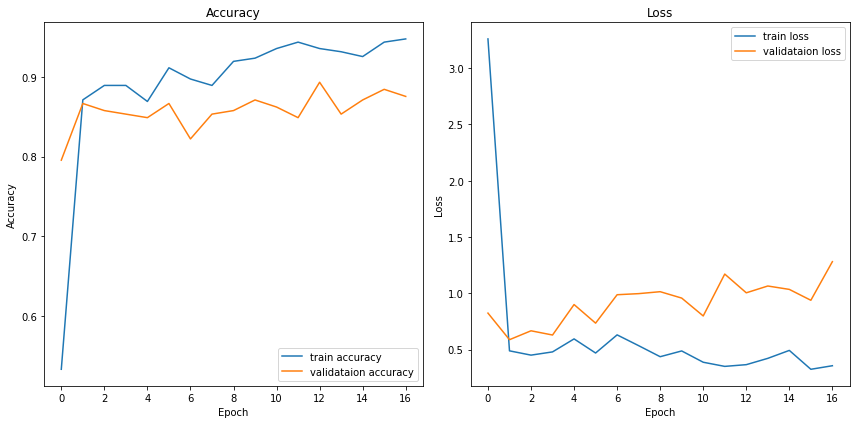

In [ ]:
plotfunction(17)

#2.

keeping last 4 layers open

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
from keras.models import model_from_json
model.load_weights(r'/content/drive/MyDrive/VGGface/vgg_face_weights.h5')

In [ ]:
model.layers[-4].output

<KerasTensor: shape=(None, 1, 1, 4096) dtype=float32 (created by layer 'dropout_7')>

In [ ]:
model = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_39_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_39 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_48 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_40 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_49 (Conv2D)          (None, 224, 224, 64)      36928     
                                                           

In [ ]:


#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/VGGface/2.h5"
csvl = r'/content/drive/MyDrive/VGGface/2.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 10 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]
#callbacks = [ checkpoint]


# Freeze all layers 
for layer in model.layers[:-4]:
  layer.trainable = False

#addind one last trainble layer with number of classes depending on my data
# i have 25 differnt classes
fchead = addlayer(model, 25)

#this is the final model
#the last layer is the trainble one
newmodel = Model(inputs = model.input , outputs = fchead)
#newmodel.summary()

newmodel.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))


history = newmodel.fit(

trd,
epochs = 200,
validation_data= vdt,
callbacks = callbacks,
)
newmodel.save(cp)

Epoch 1/200
34/34 [==============================] - ETA: 0s - loss: 1.9041 - accuracy: 0.6419
Epoch 1: val_loss improved from inf to 0.76626, saving model to /content/drive/MyDrive/VGGface/2.h5
34/34 [==============================] - 20s 554ms/step - loss: 1.9041 - accuracy: 0.6419 - val_loss: 0.7663 - val_accuracy: 0.8044
Epoch 2/200
34/34 [==============================] - ETA: 0s - loss: 0.3434 - accuracy: 0.9095
Epoch 2: val_loss improved from 0.76626 to 0.59410, saving model to /content/drive/MyDrive/VGGface/2.h5
34/34 [==============================] - 18s 546ms/step - loss: 0.3434 - accuracy: 0.9095 - val_loss: 0.5941 - val_accuracy: 0.8800
Epoch 3/200
34/34 [==============================] - ETA: 0s - loss: 0.5013 - accuracy: 0.8994
Epoch 3: val_loss did not improve from 0.59410
34/34 [==============================] - 14s 403ms/step - loss: 0.5013 - accuracy: 0.8994 - val_loss: 0.7675 - val_accuracy: 0.8533
Epoch 4/200
34/34 [==============================] - ETA: 0s - loss:

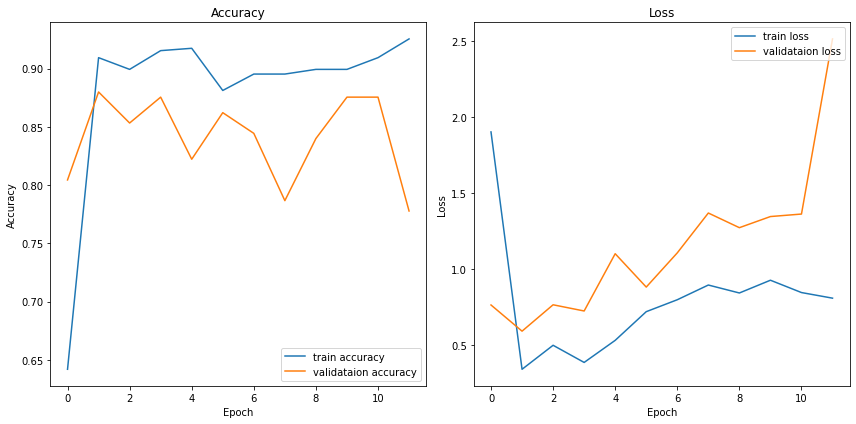

In [ ]:
plotfunction(12)

#3.

freezing all layers and adding a 25-neuron layer

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))




model.load_weights(r'/content/drive/MyDrive/VGGface/vgg_face_weights.h5')






model = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)







#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/VGGface/3.h5"
csvl = r'/content/drive/MyDrive/VGGface/3.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 10 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]
#callbacks = [ checkpoint]


# Freeze all layers 
for layer in model.layers:
  layer.trainable = False

#addind one last trainble layer with number of classes depending on my data
# i have 25 differnt classes
fchead = addlayer(model, 25)

#this is the final model
#the last layer is the trainble one
newmodel = Model(inputs = model.input , outputs = fchead)
#newmodel.summary()

newmodel.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))


history = newmodel.fit(

trd,
epochs = 200,
validation_data= vdt,
callbacks = callbacks,
)
newmodel.save(cp)

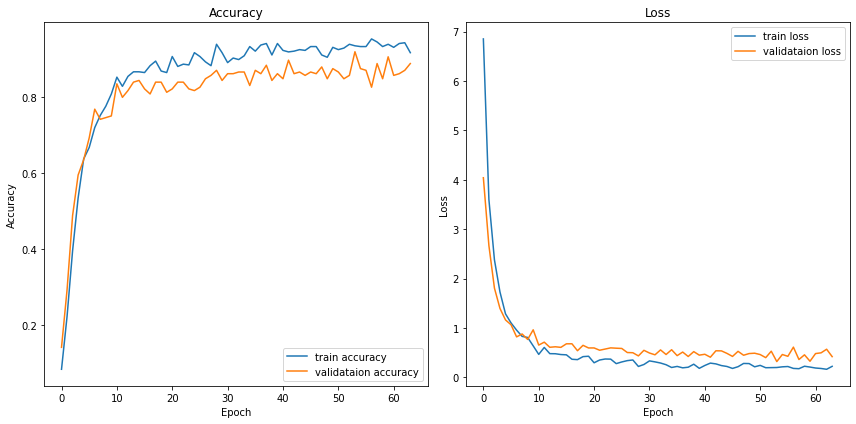

In [ ]:
plotfunction(64)

#4.

freezing all layers and using a smaller learinig rate

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))




model.load_weights(r'/content/drive/MyDrive/VGGface/vgg_face_weights.h5')






model = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)







#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/VGGface/4.h5"
csvl = r'/content/drive/MyDrive/VGGface/4.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]
#callbacks = [ checkpoint]


# Freeze all layers 
for layer in model.layers:
  layer.trainable = False

#addind one last trainble layer with number of classes depending on my data
# i have 25 differnt classes
fchead = addlayer(model, 25)

#this is the final model
#the last layer is the trainble one
newmodel = Model(inputs = model.input , outputs = fchead)
#newmodel.summary()

newmodel.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.00005))


history = newmodel.fit(

trd,
epochs = 300,
validation_data= vdt,
callbacks = callbacks,
)
newmodel.save(cp)

Epoch 1/300
34/34 [==============================] - ETA: 0s - loss: 7.1555 - accuracy: 0.0543
Epoch 1: val_loss improved from inf to 4.90046, saving model to /content/drive/MyDrive/VGGface/4.h5
34/34 [==============================] - 18s 507ms/step - loss: 7.1555 - accuracy: 0.0543 - val_loss: 4.9005 - val_accuracy: 0.0667
Epoch 2/300
34/34 [==============================] - ETA: 0s - loss: 5.0545 - accuracy: 0.1288
Epoch 2: val_loss improved from 4.90046 to 3.64313, saving model to /content/drive/MyDrive/VGGface/4.h5
34/34 [==============================] - 16s 465ms/step - loss: 5.0545 - accuracy: 0.1288 - val_loss: 3.6431 - val_accuracy: 0.1911
Epoch 3/300
34/34 [==============================] - ETA: 0s - loss: 4.1493 - accuracy: 0.2012
Epoch 3: val_loss improved from 3.64313 to 2.79034, saving model to /content/drive/MyDrive/VGGface/4.h5
34/34 [==============================] - 16s 473ms/step - loss: 4.1493 - accuracy: 0.2012 - val_loss: 2.7903 - val_accuracy: 0.3067
Epoch 4/300

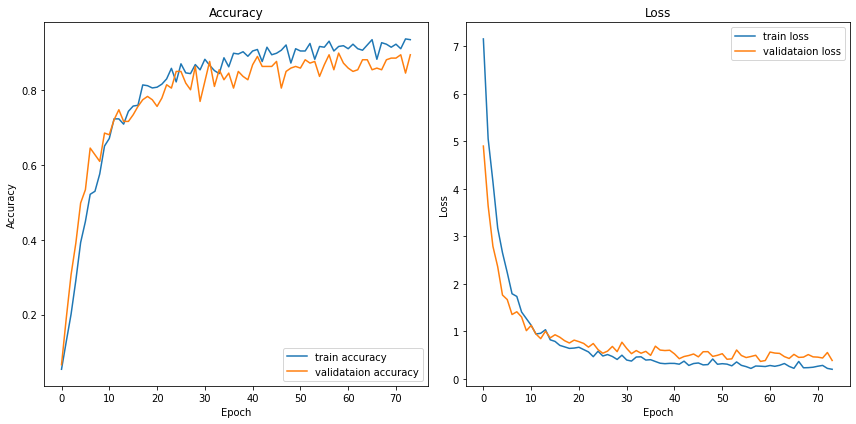

In [ ]:
plotfunction(74)

#5.

no transfer learning

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))




#model.load_weights(r'/content/drive/MyDrive/VGGface/vgg_face_weights.h5')






model = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)







#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/VGGface/5.h5"
csvl = r'/content/drive/MyDrive/VGGface/5.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 10 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]
#callbacks = [ checkpoint]


# Freeze all layers 
#for layer in model.layers:
 # layer.trainable = False

#addind one last trainble layer with number of classes depending on my data
# i have 25 differnt classes
fchead = addlayer(model, 25)

#this is the final model
#the last layer is the trainble one
newmodel = Model(inputs = model.input , outputs = fchead)
#newmodel.summary()

newmodel.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))


history = newmodel.fit(

trd,
epochs = 200,
validation_data= vdt,
callbacks = callbacks,
)
newmodel.save(cp)

Epoch 1/200
34/34 [==============================] - ETA: 0s - loss: 3.3006 - accuracy: 0.0241
Epoch 1: val_loss improved from inf to 3.21863, saving model to /content/drive/MyDrive/VGGface/5.h5
34/34 [==============================] - 32s 913ms/step - loss: 3.3006 - accuracy: 0.0241 - val_loss: 3.2186 - val_accuracy: 0.0356
Epoch 2/200
34/34 [==============================] - ETA: 0s - loss: 3.2198 - accuracy: 0.0382
Epoch 2: val_loss did not improve from 3.21863
34/34 [==============================] - 23s 683ms/step - loss: 3.2198 - accuracy: 0.0382 - val_loss: 3.2187 - val_accuracy: 0.0400
Epoch 3/200
34/34 [==============================] - ETA: 0s - loss: 3.2197 - accuracy: 0.0463
Epoch 3: val_loss improved from 3.21863 to 3.21826, saving model to /content/drive/MyDrive/VGGface/5.h5
34/34 [==============================] - 29s 858ms/step - loss: 3.2197 - accuracy: 0.0463 - val_loss: 3.2183 - val_accuracy: 0.0400
Epoch 4/200
34/34 [==============================] - ETA: 0s - loss:

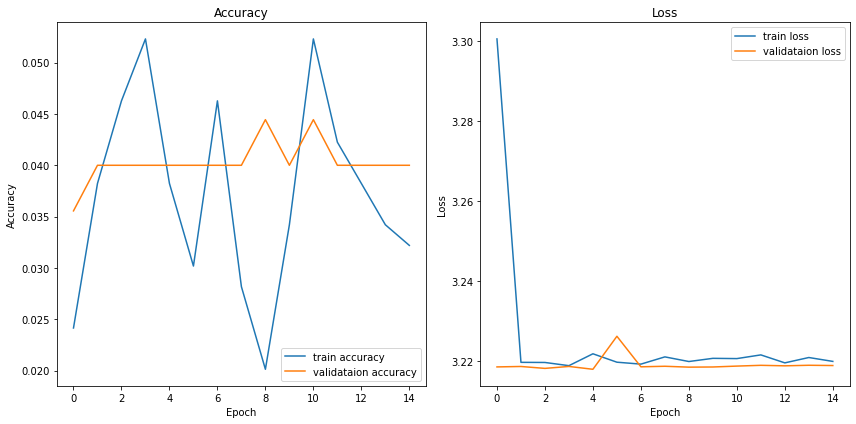

In [ ]:
plotfunction(15)